In [144]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")


pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)



In [145]:
df=pd.read_csv('/kaggle/input/used-car-dataset-ford-and-mercedes/bmw.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.600,2.000
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.800,2.000
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.400,3.000
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.400,1.500
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.400,3.000


In [146]:
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(3))
    print("##################### Tail #####################")
    print(dataframe.tail(3))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())



check_df(df)

##################### Shape #####################
(10781, 9)
##################### Types #####################
model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object
##################### Head #####################
       model  year  price transmission  mileage fuelType  tax    mpg  \
0   5 Series  2014  11200    Automatic    67068   Diesel  125 57.600   
1   6 Series  2018  27000    Automatic    14827   Petrol  145 42.800   
2   5 Series  2016  16000    Automatic    62794   Diesel  160 51.400   

   engineSize  
0       2.000  
1       2.000  
2       3.000  
##################### Tail #####################
           model  year  price transmission  mileage fuelType  tax    mpg  \
10778   3 Series  2017  13100       Manual    25468   Petrol  200 42.800   
10779   1 Series  2014   9930    Automatic    45000   Di

In [147]:

def data_overlook(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, cat_but_car, num_cols

cat_cols, cat_but_car, num_cols = data_overlook(df)

Observations: 10781
Variables: 9
cat_cols: 2
num_cols: 6
cat_but_car: 1
num_but_cat: 0


In [148]:
for col in df.columns:
    print(col,df[col].dtype)

model object
year int64
price int64
transmission object
mileage int64
fuelType object
tax int64
mpg float64
engineSize float64


In [149]:
df.year=df.year.astype('object')

              transmission  Ratio
transmission                     
Semi-Auto             4666 43.280
Automatic             3588 33.281
Manual                2527 23.439
          fuelType  Ratio
fuelType                 
Diesel        7027 65.179
Petrol        3417 31.695
Hybrid         298  2.764
Other           36  0.334
Electric         3  0.028
count     10781
unique       25
top        2019
freq       3485
Name: year, dtype: int64


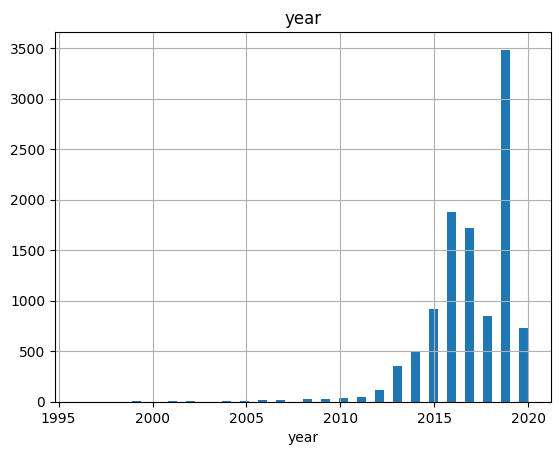

count    10781.000
mean     22733.409
std      11415.528
min       1200.000
5%        9500.000
10%      11199.000
20%      13881.000
30%      15981.000
40%      17999.000
50%      20462.000
60%      22980.000
70%      25999.000
80%      29990.000
90%      35995.000
95%      45991.000
99%      64019.800
max     123456.000
Name: price, dtype: float64


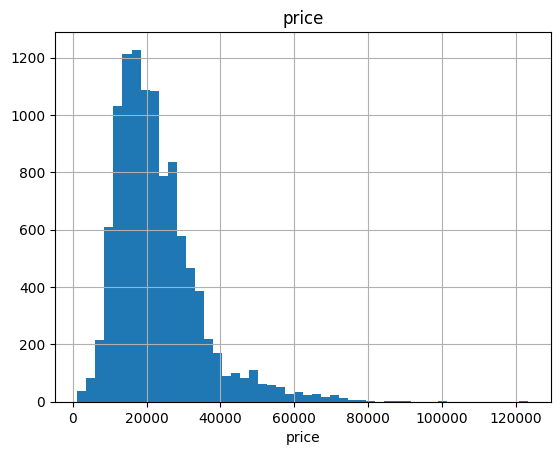

count    10781.000
mean     25496.987
std      25143.193
min          1.000
5%         102.000
10%       1320.000
20%       4327.000
30%       7000.000
40%      10927.000
50%      18347.000
60%      25544.000
70%      33316.000
80%      44028.000
90%      62000.000
95%      76290.000
99%     102104.000
max     214000.000
Name: mileage, dtype: float64


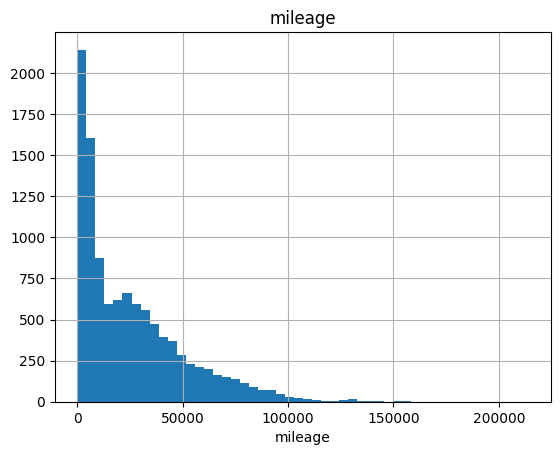

count   10781.000
mean      131.702
std        61.511
min         0.000
5%         20.000
10%        30.000
20%       125.000
30%       145.000
40%       145.000
50%       145.000
60%       145.000
70%       145.000
80%       150.000
90%       160.000
95%       200.000
99%       300.000
max       580.000
Name: tax, dtype: float64


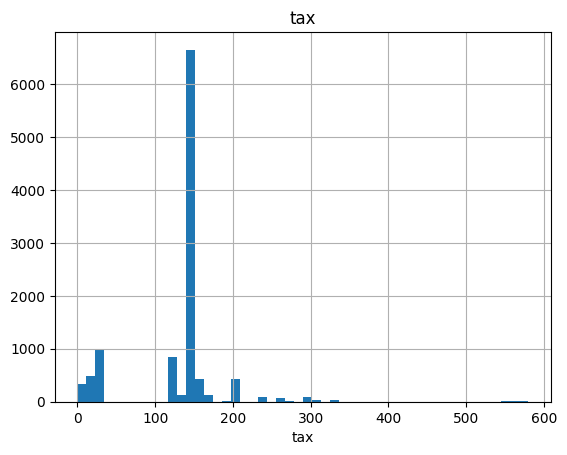

count   10781.000
mean       56.399
std        31.337
min         5.500
5%         34.000
10%        37.700
20%        42.200
30%        47.900
40%        50.400
50%        53.300
60%        55.500
70%        60.100
80%        64.200
90%        68.900
95%        72.400
99%       148.700
max       470.800
Name: mpg, dtype: float64


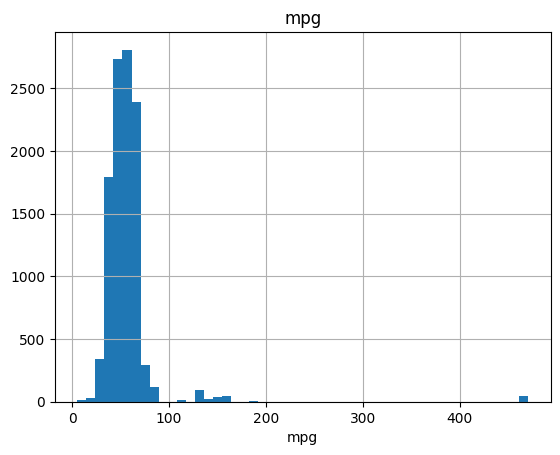

count   10781.000
mean        2.168
std         0.552
min         0.000
5%          1.500
10%         1.500
20%         2.000
30%         2.000
40%         2.000
50%         2.000
60%         2.000
70%         2.000
80%         3.000
90%         3.000
95%         3.000
99%         3.000
max         6.600
Name: engineSize, dtype: float64


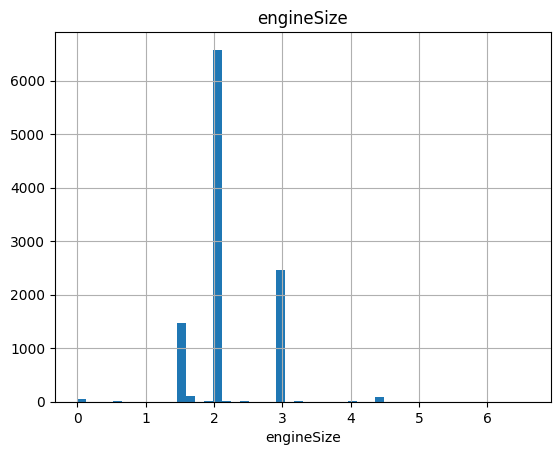

In [150]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()


for col in cat_cols:
    cat_summary(df, col)



######################################
# 3. Sayısal Değişken Analizi (Analysis of Numerical Variables)
######################################

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)


for col in num_cols:
    num_summary(df, col, True)


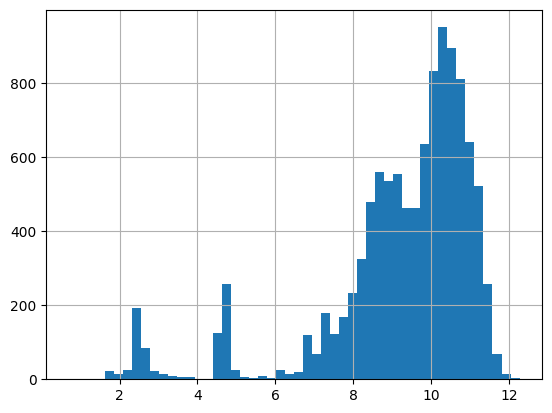

In [151]:
np.log1p(df['mileage']).hist(bins=50)
plt.show()

In [152]:
corr = df[num_cols].corr()
corr


,year,price,mileage,tax,mpg,engineSize
year,1.000,0.624,-0.774,0.025,-0.072,-0.026
price,0.624,1.000,-0.605,0.263,-0.205,0.460
mileage,-0.774,-0.605,1.000,-0.171,0.119,-0.003
tax,0.025,0.263,-0.171,1.000,-0.352,0.430
mpg,-0.072,-0.205,0.119,-0.352,1.000,-0.400
engineSize,-0.026,0.460,-0.003,0.430,-0.400,1.000


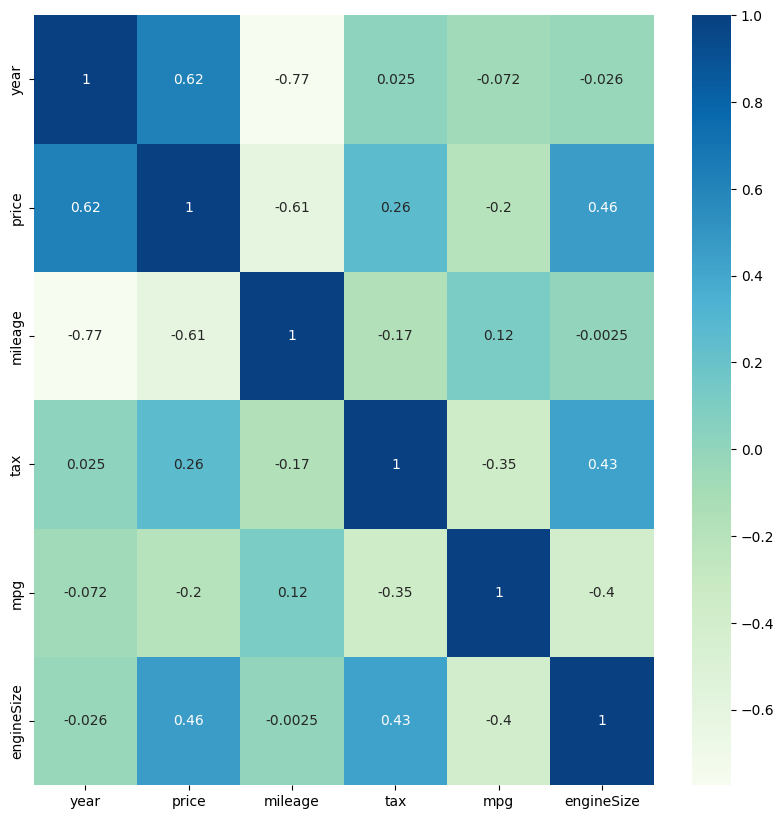

In [153]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap='GnBu',annot=True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7885c397d480>,
 'caps': [<matplotlib.lines.Line2D at 0x7885c397d8a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7885c397d1e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7885c397dde0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7885c397e080>],
 'means': []}

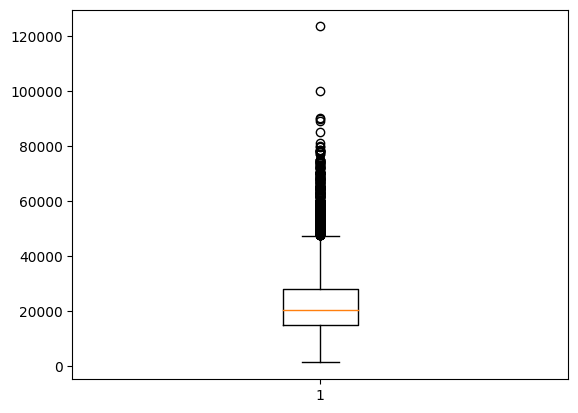

In [154]:
plt.boxplot(x=df['price'])

# after df.describe :)

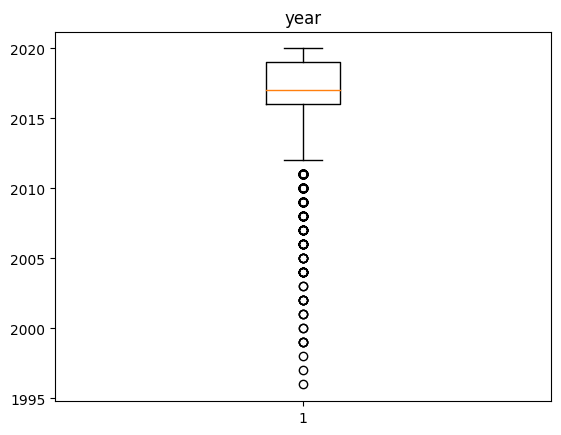

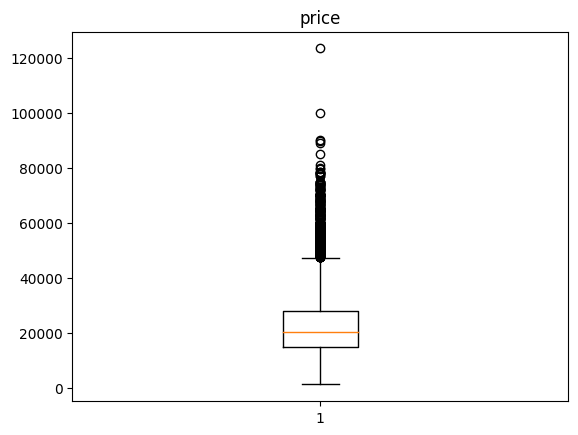

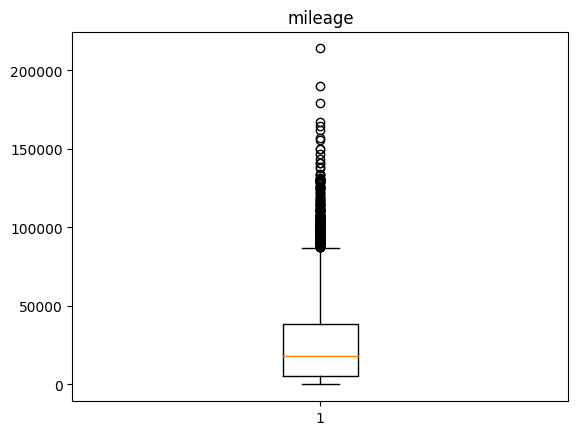

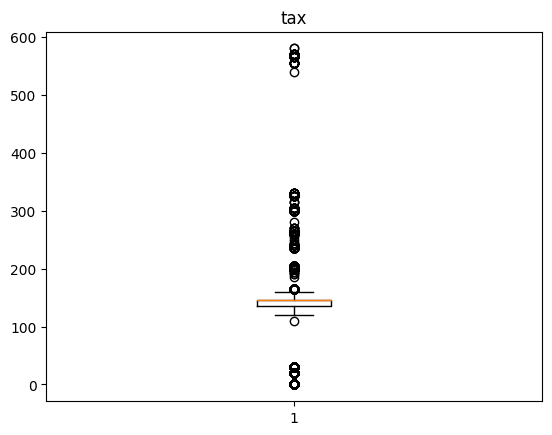

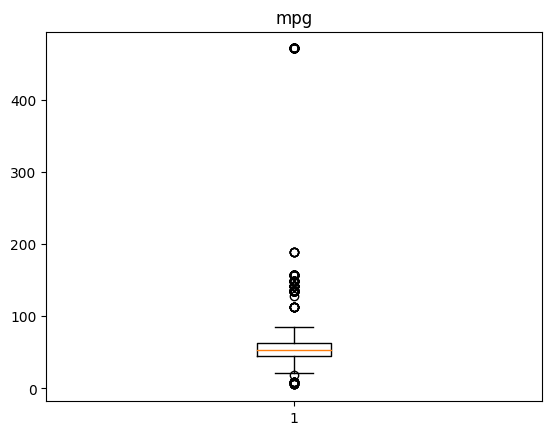

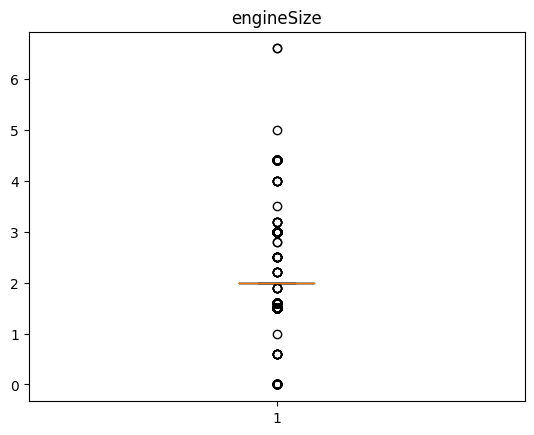

In [155]:
for col in num_cols:
    plt.boxplot(x=df[col])
    plt.title(f"{col}")
    plt.show()

In [156]:
def outlier_thresholds(dataframe, variable, low_quantile=0.10, up_quantile=0.90):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

# Aykırı değer kontrolü
outs=[]
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


for col in num_cols:
    if col != "price":
      print(col, check_outlier(df, col))
      outs.append(col)  
    


year True
mileage True
tax True
mpg True
engineSize True


In [157]:
outs

['year', 'mileage', 'tax', 'mpg', 'engineSize']

In [158]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


for col in outs:
    replace_with_thresholds(df,col)


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  object 
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 758.2+ KB


In [160]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,10781.000,22733.409,11415.528,1200.000,14950.000,20462.000,27940.000,123456.000
mileage,10781.000,25481.690,25054.019,1.000,5529.000,18347.000,38206.000,153020.000
tax,10781.000,130.913,57.155,0.000,135.000,145.000,145.000,355.000
mpg,10781.000,54.432,14.948,5.500,45.600,53.300,62.800,115.700
engineSize,10781.000,2.168,0.550,0.000,2.000,2.000,2.000,5.250


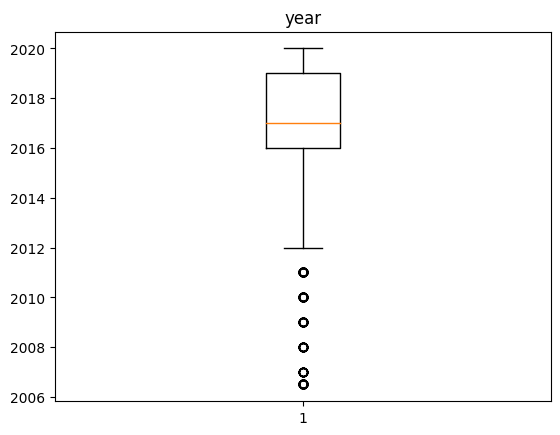

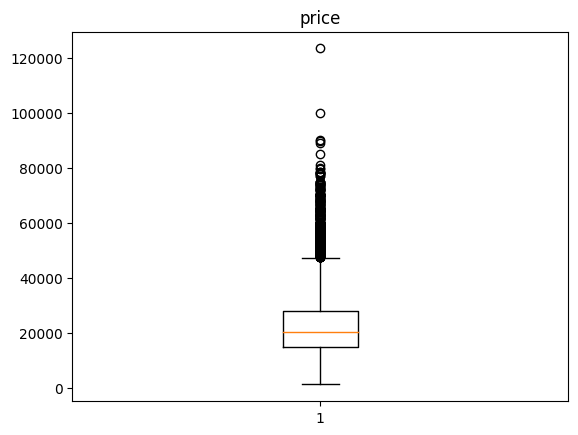

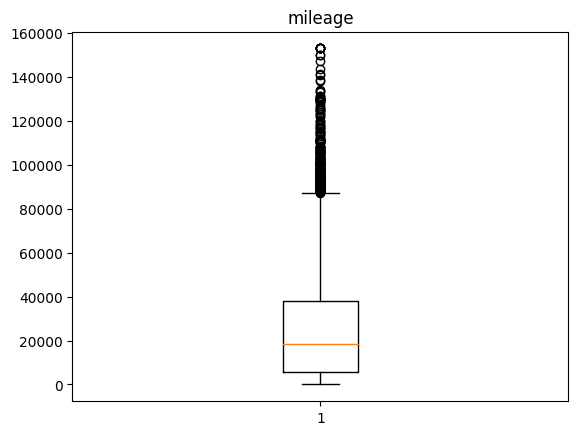

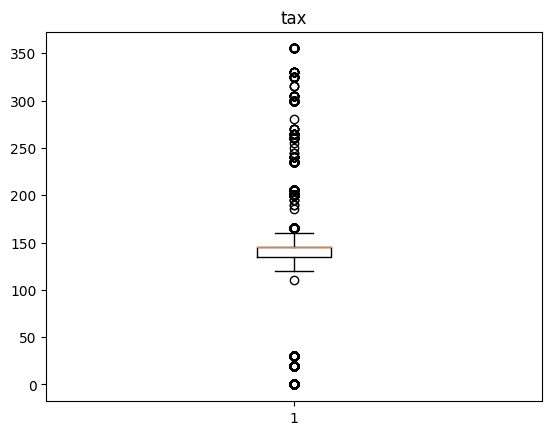

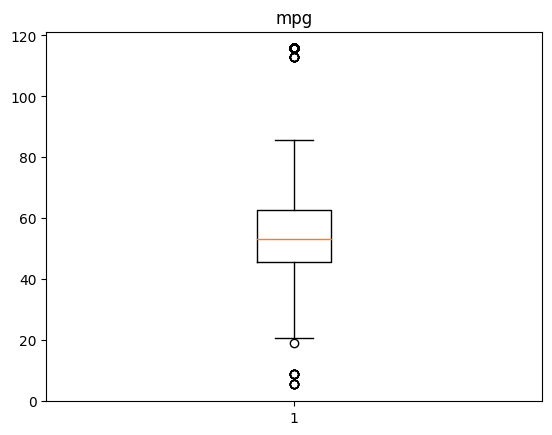

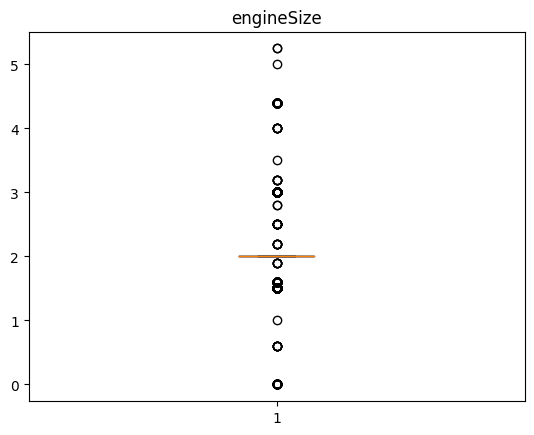

In [161]:
for col in num_cols:
    plt.boxplot(x=df[col])
    plt.title(f"{col}")
    plt.show()

In [162]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

rare_analyser(df, "price", cat_cols)


transmission : 3
              COUNT  RATIO  TARGET_MEAN
transmission                           
Automatic      3588  0.333    22419.024
Manual         2527  0.234    14637.451
Semi-Auto      4666  0.433    27359.748


fuelType : 5
          COUNT  RATIO  TARGET_MEAN
fuelType                           
Diesel     7027  0.652    21779.263
Electric      3  0.000    18466.000
Hybrid      298  0.028    27169.715
Other        36  0.003    18193.861
Petrol     3417  0.317    24360.272




## FEATURE EXTRACTION

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  object 
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 758.2+ KB


In [164]:
num_cols

['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']

In [165]:
df['price/perf']=df['price']/df['mpg']


In [166]:
df['gain']=df['engineSize']/df['mileage']


In [167]:
df["tax_score"] = pd.cut(df['tax'], 5, labels=[1,2,3,4,5])


In [168]:
df.tax.max()
df.tax.min()

0

In [169]:
df.transmission.nunique()

3

In [170]:
df['taxless']=df.price-df.tax*10

In [171]:

def data_overlook(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, cat_but_car, num_cols

cat_cols, cat_but_car, num_cols = data_overlook(df)

Observations: 10781
Variables: 13
cat_cols: 4
num_cols: 8
cat_but_car: 1
num_but_cat: 1


In [172]:
num_cols

['price',
 'mileage',
 'tax',
 'mpg',
 'engineSize',
 'price/perf',
 'gain',
 'taxless']

In [173]:
cat_cols

['year', 'transmission', 'fuelType', 'tax_score']

In [179]:
encoder = LabelEncoder()
df['model'] = encoder.fit_transform(df['model'])

In [180]:

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe


df = one_hot_encoder(df, cat_cols, drop_first=True)

df.head()


,model,price,mileage,tax,mpg,engineSize,price/perf,gain,taxless,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,tax_score_2,tax_score_3,tax_score_4,tax_score_5
0,4,11200,67068,125,57.600,2.000,194.444,0.000,9950,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,5,27000,14827,145,42.800,2.000,630.841,0.000,25550,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False
2,4,16000,62794,160,51.400,3.000,311.284,0.000,14400,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,0,12750,26676,145,72.400,1.500,176.105,0.000,11300,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
4,6,14500,39554,160,50.400,3.000,287.698,0.000,12900,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [181]:
num_cols

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()
df.shape


(10781, 33)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   model                   10781 non-null  int64  
 1   price                   10781 non-null  float64
 2   mileage                 10781 non-null  float64
 3   tax                     10781 non-null  float64
 4   mpg                     10781 non-null  float64
 5   engineSize              10781 non-null  float64
 6   price/perf              10781 non-null  float64
 7   gain                    10781 non-null  float64
 8   taxless                 10781 non-null  float64
 9   year_2007               10781 non-null  bool   
 10  year_2008               10781 non-null  bool   
 11  year_2009               10781 non-null  bool   
 12  year_2010               10781 non-null  bool   
 13  year_2011               10781 non-null  bool   
 14  year_2012               10781 non-null

In [183]:
y = df["price"]
X = df.drop("price", axis=1)

In [184]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [185]:
print("x_train shape is:",X_train.shape)


x_train shape is: (8624, 32)


In [186]:
print("y_train shape is:",y_train.shape)


y_train shape is: (8624,)


In [187]:
print("X_test shape is:",X_test.shape)


X_test shape is: (2157, 32)


In [188]:
print("y_test shape is:",y_test.shape)


y_test shape is: (2157,)


In [189]:
LR = LinearRegression()
LR.fit(X_train, y_train)

print('Linear Regression Train Score is : ' , LR.score(X_train, y_train))
print('Linear Regression Test Score is : ' , LR.score(X_test, y_test))
print('Linear Regression Coef is : ' , LR.coef_)
print('Linear Regression intercept is : ' , LR.intercept_)
print('----------------------------------------------------')

y_pred = LR.predict(X_test)
print('Predicted Value for Linear Regression is : ' , y_pred[:10])

Linear Regression Train Score is :  1.0
Linear Regression Test Score is :  1.0
Linear Regression Coef is :  [ 1.34350542e-15  1.11022302e-16  5.00676763e-02 -1.49434926e-16
  2.74964297e-16  5.02672010e-17 -1.84287993e-16  9.87098501e-01
  4.18329433e-16  6.99687835e-16  8.75973288e-16  1.15541493e-16
  1.33366332e-16  2.96076743e-16  8.46910819e-16  3.98115526e-16
  3.78494345e-16  5.67254577e-16  7.73686670e-16  3.40005801e-16
  6.10622664e-16  5.62050406e-16  1.66533454e-16  1.59594560e-16
  2.85795693e-16  1.43982049e-16  4.18068358e-16 -6.00214323e-16
  2.35922393e-16  7.63278329e-17  2.38958159e-16  3.85108612e-16]
Linear Regression intercept is :  -7.60069090999238e-15
----------------------------------------------------
Predicted Value for Linear Regression is :  [ 0.63649513  0.50079647  0.54854068 -0.59031184 -0.25259826 -0.85312395
 -0.90524836 -0.7739299  -1.00432853 -0.72303196]


In [192]:
RandomForestRegressorModel = RandomForestRegressor()
RandomForestRegressorModel.fit(X_train, y_train)

print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test))
#print('Random Forest Regressor No. of features are : ' , RandomForestRegressorModel.n_features_)
print('----------------------------------------------------')

y_pred = RandomForestRegressorModel.predict(X_test)
print('Predicted Value for Random Forest Regressor is : ' , y_pred[:10])

Random Forest Regressor Train Score is :  0.999807329028166
Random Forest Regressor Test Score is :  0.9998816741452292
----------------------------------------------------
Predicted Value for Random Forest Regressor is :  [ 0.63649426  0.50077983  0.5485398  -0.59037403 -0.25200606 -0.85486114
 -0.90433903 -0.7715243  -1.00782305 -0.72374155]


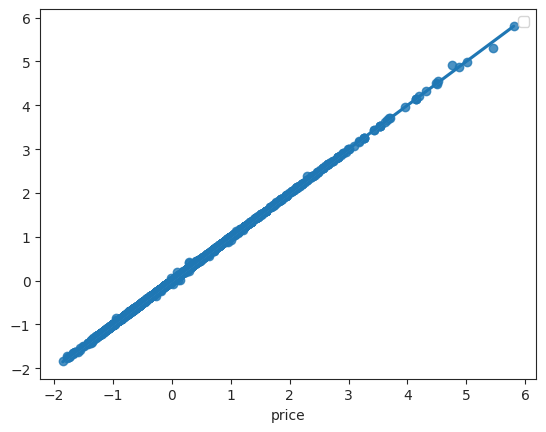

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('ticks')
sns.regplot(x=y_test,y=y_pred, fit_reg=True)
plt.legend()

In [194]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9998816741452292

In [196]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(RandomForestRegressorModel, X_test, y_pred, cv=10))

[0.99971832 0.99967784 0.99975256 0.99747921 0.99971439 0.99973675
 0.99955974 0.99950669 0.99978281 0.99972718]


In [197]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(LR, X_test, y_pred, cv=10))

[0.99989776 0.99983608 0.99989063 0.99984487 0.99995417 0.99992638
 0.9999662  0.99977247 0.9999578  0.99988223]


In [ ]:

models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor()),
          ("CatBoost", CatBoostRegressor(verbose=False))]

for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

# MAE
from sklearn.metrics import mean_absolute_error
for name, regressor in models:
    model = regressor.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
    print(f"MAE: {mae} ({name}) ")



RMSE: 0.0 (LR) 
RMSE: 0.0003 (Ridge) 
RMSE: 0.9301 (Lasso) 
RMSE: 0.693 (ElasticNet) 
RMSE: 0.1791 (KNN) 
RMSE: 0.0298 (CART) 
RMSE: 0.0274 (RF) 
RMSE: 0.0795 (SVR) 
RMSE: 0.0238 (GBM) 
